In [2]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)

# Lecture 1: Basics and principles of Bayesian theory

## Motivation examples

### Coin flipping

*We flip a coin and are interested in the probability that we obtain either side (head or tail). Is our coin fair?*

Let us denote 1 as the head and 0 as the tail. A classical way would be to flip the coin several times and record the results in a table (matrix). Then, we can plot a histogram (_plt.hist()_), however, we will use another plot type in the lecture. The coin tossing can be simulated using *np.random.randint()* function, that randomly (and uniformly, but let us suppose we are not aware of this :-)) samples integers from a given interval.

Head: 512 (0.51)
Tail: 488 (0.49)


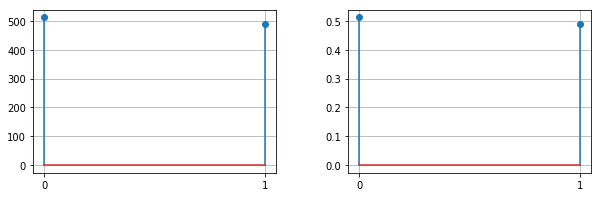

In [3]:
nsamples = 1000 ### ("###" denotes parameters that can be changed)
results = np.random.randint(0, 2, size=nsamples)
counts = np.array([results.sum(), nsamples - results.sum()])
frequences = counts/nsamples
print('Head: {0} ({1:.2})'.format(counts[0], frequences[0]))
print('Tail: {0} ({1:.2})'.format(counts[1], frequences[1]))
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.stem(counts)
plt.xticks([0, 1])
plt.subplot(1,2,2)
plt.stem(frequences)
plt.xticks([0, 1])
plt.show()

As we pragmatically denoted the head and the tail as 1 and 0, the number of heads is equal to the sum of ones and the number of tails is the rest to the number of tosses. That is why the variable _counts_.

**Think abouts...**
- **Imagine, what the table and graphs really express.**
- **Experiment with the variable *nsamples***

Below follows a bit more complicated example.

### Die tossing

*Assume that we have an ordinary six-sided die. Our goal is to assess the probabilities of the sides. Is the die fair?*

The steps are analogous to the previous example, but the source code will be a bit more complicated - we do not have only 0s and 1s.

[[1.00e+00 2.00e+00 3.00e+00 4.00e+00 5.00e+00 6.00e+00]
 [1.67e+04 1.68e+04 1.67e+04 1.65e+04 1.67e+04 1.66e+04]
 [1.67e-01 1.68e-01 1.67e-01 1.65e-01 1.67e-01 1.66e-01]]


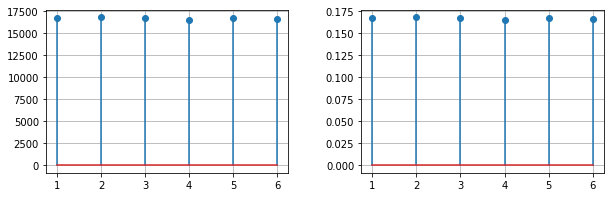

In [4]:
nsamples = 100000  ###
results = np.random.randint(1, 7, size=nsamples)
numbers, counts = np.unique(results, return_counts=True)
frequences = counts/nsamples
print(np.c_[numbers, counts, frequences].T)
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.stem(numbers, counts)
plt.subplot(1,2,2)
plt.stem(numbers, frequences)
plt.show()

**_Think abouts_**
- **Again, what does the table and the figures express?**
- **Experiment with *nsamples***

Answers are quite simple. The left plot shows the **absolute frequencies** of the sides, while the right plot shows the **relative frequencies**, which are normalized and sum to unity. That means, that they correspond to *probabilities* of the respective sides. The more uniform plot, the more fair the die. And since *np.random.randint()* samples from the uniform distribution, the higher number of samples, the more balanced plot.

### Fuel consumption

*We experimentally measure the fuel consumption of a car under stable conditions and assess the "theoretical" consumption.*

This task is virtually an example of a *continuous* random variable modelling using imprecise measurements influenced by unpredictable measurement errors due to imperfect measurement conditions and process. Relatively straightforward solution is to measure a bunch of numbers and calculate their arithmetic average (mean). And - as engineers - we also calculate the standard deviation, i.e., the square root of the measurements variance. Note that it is assumed, that the errors are symmetrically distributed around their average value, which is zero! (why?)

In [5]:
consumption = np.array([5.5, 5.4, 5.7, 5.6, 6.1, 5.9, 5.8, 6.0, 5.9]) ###
avg = consumption.mean()
std = consumption.std()
print('Average consumption: ({0:.1f}+-{1:.1f})l/100km'.format(avg, std))

Average consumption: (5.8+-0.2)l/100km


### That is all nice, but!

The given examples demonstrate the classical _frequentists'_ approach to the problem. We assessed frequencies of given phenomena (random events) and stated them as the results. However, several questions remain:
- are the results unambiguous?
- if we change the number of trials (measurements, i.e., the amount of data), does anything change?
- if we were given some external (prior) information, e.g., that the coin had head-tail probabilities [0.6, 0.4], can we use it somehow?

A popular way how to treat these topics is to adopt the Bayesian approach to statistics (probability, machine learning...).

# Bayesian theory

## Data are described by a model

The data (measurements, observations) and their properties are described by a *mathematical model*. We met the first models already on basic school, e.g., as the equation for velocity $v=displacement/time$. This is a physical model. Similarly, we may model a weight of an object based on its repetitive measurements. We know, that the validity of a physical model is limited. For instance, the velocity equation is becomes very imprecise if the velocity is very high and the relativistic events occur. This was observed, e.g., in GPS. Similarly, the weight of an object can be measured with various precisions. Therefore, the statistics (Bayesian or frequentist) is often used to explain the imprecision. Here, the models are probability distributions.

### Coin
A suitable model for the coin is the Bernoulli distribution. If we denote $X=1$ the event "head", and $X=0$ the event "tail", and the probability of head as $\pi\in[0,1]$ (remind, this is a closed interval!), then this distribution is given by the probability mass function (pmf)

$$
f(X|\pi) = \pi^{x} (1-\pi)^{1-x}, \qquad x\in\{0, 1\},
$$

and we write $X\sim\mathcal{B}\textit{ernoulli}(\pi)$, or shortly $X\sim\mathcal{B}\textit{er}(\pi)$.

If you try to set a value for $X$, you obtain the corresponding probability (try!). The *mean value* (aka expected value or expectation) is $\mathbb{E}[X] = \pi$. This is particularly easy to show, as

$$
\mathbb{E}[X] = \sum_i x_i f(x_i).
$$

(Note that the notation is somewhat inconsistent here - this is for simplicity, the audience is intelligent :-)

**In our modelling we know everything up to $\pi$. Its reliable estimation is our modelling task.**

However, let us continue for a moment yet. Note that we can toss the coin not only once, but several times (say $n$-times) and claim, that the head occurs $k$-times, where $k\leq n$. The tosses are independent and correspond to $n$ Bernoulli trials. We may describe (*model*) the *number of heads* using the *binomial distribution* of random variable $Y \sim\textit{binom}(n, \pi)$ with probability

$$
f(Y=k|n, \pi) = \binom{n}{k}\pi^k (1-\pi)^{n-k}, \qquad \text{with expectation}\quad \mathbb{E}[Y] = n\pi.
$$

The following source code plots binomial distribution pmf for preset $n$ and $\pi$. Keep in mind that we assume $Y=k$, i.e., the number of heads, hence $k\in\{0,\ldots, n\}$.

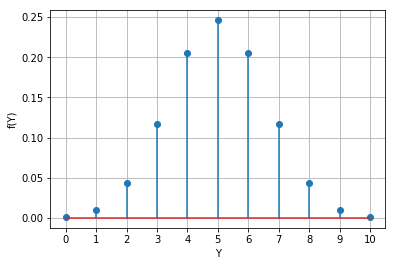

In [6]:
from scipy.stats import binom
n = 10                               ###
p = .5                               ###
ks = np.arange(0, n+1)
probs = binom.pmf(n=n, p=p, k=ks)
plt.stem(ks, probs)
plt.xticks(ks)
plt.xlabel('Y')
plt.ylabel('f(Y)')
plt.show()

**Think abouts...**
- modify the code so that it plots the Bernoulli pmf (what needs to be changed?
- think why the expected value may be non-integer, while the realizations are integers.

### Die

While the coin has two values for the head and the tail, respectively, and can be modelled with the Bernoulli distribution, our die has six cases, i.e., six possible values. This means that something similar to the Bernoulli distribution, but with a richer set of outcomes is required. The solution is the *multinomial* distribution.

Let us denote $x=[x_1,\ldots, x_k]$ the vector where each $x_i\in\{0,...n\}$ represents the number of occurences of $i$th side of the die, $n\in\mathbb{N}_0$ is the number of tosses. For $k$-sided die there is $k$ probabilities (what is their sum?). We can aggregate these probabilities into a vector $\pi=[\pi_1, \ldots, \pi_k]$. The multinomial distribution $\mathcal{M}\textit{ulti}(n, \pi)$ is given by the pmf

$$
f(X) = \frac{n!}{x_1! \cdots x_k!} \pi_1^{x_1} \cdots \pi_k^{x_k} \qquad\text{with}\quad \mathbb{E}[X_i] = n\pi_i, \quad i\in\{1,\ldots,n\}.
$$

Remind that the binomial distribution with $n=1$ corresponds to the Bernoulli distribution, the counterpart here is called the categorical distribution, $\mathcal{C}\it{at}(\pi)$.

**Think abouts...**
- what is the sum of $\pi_i$?
- if we want to calculate pmf for $n$ tosses, what is the sum of elements of the vector $x$?
- assume $n = 1$. How will look the pmf plot?
- how many possible combinations of outcomes are there for $n=2$ and for $n=4$? This also replies the answer: "Is it possible to easily plot any multinomial pmf?"

Let us plot the pmf for $n = 1$. This provides answer to one of the questions.

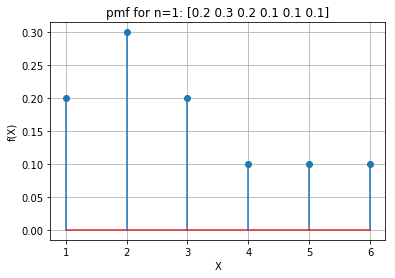

In [7]:
from scipy.stats import multinomial
n = 1                                        ###
pi = np.array([.2, .3, .2, .1, .1, .1])      ###
eye = np.eye(pi.size)                        ###
xis = np.arange(1, pi.size+1)
probs = multinomial.pmf(x=eye, n=n, p=pi)
plt.stem(xis, probs)
plt.xticks(xis)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title("pmf for n=1: {0}".format(probs))
plt.show()

The variable *eye* is an identity matrix. $k$th row says that the $k$th die side occured. For $n = 1$ - right one toss - it is pretty easy, isn't it? However, for multiple tosses it is not, as shows the following code. In it we plot pmf values ofr several (*n_samples)* randomly chosen combinations of $n$ tosses.

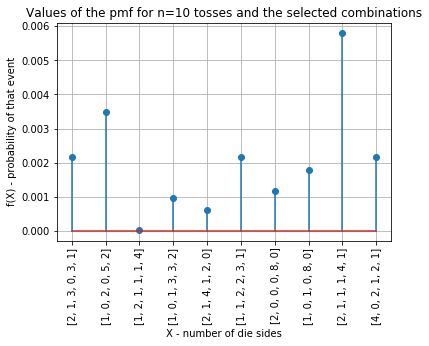

In [8]:
n = 10                                    ###
n_samples = 10                            ###
pi = np.array([.2, .05, .15, .1, .4, .1]) ###
xis = np.arange(1, pi.size+1)
rnd_samples = multinomial.rvs(n=n, p=pi, size=n_samples)
probs = multinomial.pmf(x=rnd_samples, n=n, p=pi)
plt.stem(probs)
plt.xticks(range(n_samples), [str(l) for l in rnd_samples.tolist()], rotation=90)
plt.xlabel('X - number of die sides')
plt.ylabel('f(X) - probability of that event')
plt.title("Values of the pmf for n={0} tosses and the selected combinations".format(n))
plt.show()

### Fuel consumption

Recall that we assume, that the "average" measurement error is zero, i.e., the error is not *systematic*. In addition, we will assume that it is symetrically distributed both to the right and to the left around zero. Let us denote the value of the uknown estimated theoretical consumption $\mu$. Our imprecise measurements we model as a *normal* (or *Gaussian*) random variable $X\sim\mathcal{N}(\mu, \sigma^2)$ with the *probability density function* (pdf)

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-1}{2\sigma^2}(x-\mu)^2},
$$
where $x\in\mathbb{R}$, $\sigma^2>0$ is the noise variance, and $\mu\in\mathbb{R}$ is the mean value of the normal distribution. It holds $\mathbb{E}[X]=\mu$.

In our practical example, let $\mu=5.5$ and the standard deviation $\sigma=0.3$ - that is, $\sigma^2=0.09$. The pdf looks like this:

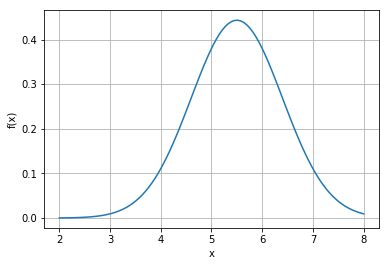

In [10]:
from scipy.stats import norm
mu = 5.5                   ###
std = 0.9                  ### !!! standard deviation, not variance !!!
x = np.linspace(2, 8, 100)
fx = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Although those "messy" exps in the normal pdf may look strange, the main advantage of the normal distribution are relatively easy calculations, often analytically tractable. On the other side, this distribution is - similarly to most others - at most a solid approximation of the reality. It is used, for instance, for modelling of the IQ, measurement errors in physical and engineering experiments, in hydrology, radars, often as approximations of other, computationally more intensive distributions.

**Think abouts...**
- IQ is assumed as normally distributed with $\mu=100$ and $\sigma=15$. It is easy to show that in the interval $[\mu-\sigma, \mu+\sigma]$ lies 68.2% of population. However, the support of the distribution is unbounded, it is $(-\infty, \infty)$. Does this make perfect sense?
- is the pdf value the probability of the corresponding event? What about the pmf?
- The sum of probabilities of a discrete variable is 1. Is there any equivalent statement for the continuous variable?
- Can the pdf value be higher than 1? What about the pmf?

## Prior knowledge (information)

**Prior knowledge is our initial knowledge about the variable of interest, before inclusion of new data (observations, measurements...)**

**Example with the coin:** Denote by $X$ one coin side and let us quantify the probability $p(X)$. For instance, we may state that we do not have any knowledge of $p(X)$, only that it is from 0 to 1 - case (A). Alternatively, we may assume that it is concentrated around 0.5 - cases (B1) and (B2). Note, that even the case (A) has the mean value 0.5, but it is equally probable as all other values in the interval, while in (B1) and (B2) the probability of 0.5 is more concentrated. We may also assume that the coin is not fair and that one side is more probable - case (C). There is plenty of other possibilities, including degenerate cases where the probability is reduced to a single point. This is called the Dirac distribution.
![Apriorna u mince](img/l1-prior-mince.jpg)

Remark: yes, we really do quantify the probability of the Bernoulli probability :-) The popular distribution for this is the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) (unfortunately, Wikipedia is not very informative in this case).


**Die example, first try:** We want to quantify our initial - prior - assumption about the distribution of probabilities of die sides. It is reasonable to assume that it is uniform, i.e., each side is equally probable. This is called the fair die, case (A). Alternatively, the assumption may be that the die is unfair (B). Or, we can set the initial probabilities randomly (C).
![Apriorna u kostky](img/l1-prior-kostka.jpg)

**Die example, second try:** In the previous try, note, we did not quantify the *uncertainty* related with the probabilities, while in the coin example, the uncertainty was included! One possible way is to assume each die side independently. A convenient solution provides the [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution), providing a manifold in a corresponding probability space.

**Obviously, the prior knowledge is expressed by the _prior distribution_, which may be discrete (with pmfs) of continuous (pdfs). If we knew the measure theory, we could avoid this division and talk only about pdfs.**

**If we include new information (measurements, observations, data) into the prior knowledge (distribution), we obtain the posterior distribution. Both distribution quantify the amount of _uncertainty_ connected with the knowledge of the variable (parameter) of interest.**

## Little recollection of probability theory

1. [Probability density function](https://en.wikipedia.org/wiki/Probability_density_function) - aka pdf - shows how the probability is distributed among possible values.
2. If $f(x)$ is a pdf, then $\int_X f(x)dx = 1$, where the integral is over the whole space of $X$. In the discrete case, we write sum instead of the integral. The measure theory unifies this...
3. [Mean value (expectation)](https://en.wikipedia.org/wiki/Expected_value) of $X$ is $\mathbb{E}[X] = \int x f(x) dx$, or $\mathbb{E}[X]= \sum_i x_i p_i$ where $x_i$ are realizations and $p_i$ their probabilities.
4. [Variance](https://en.wikipedia.org/wiki/Variance) of a random variable $X$ is $D[X] = \text{var} X = \int (x - \mathbb{E}[X])^2 f(x) dx$, or $D[X] = \text{var} X = \sum_i (x - \mathbb{E}[X])^2 p_i$. We see that it expresses the dispersion of $X$ around its mean values.
5. The mean and/or the variance may be undefined, even if we would expect the former in the center, see, e.g. the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution). It is all about math: the integral does not exist.
6. Other interesting measures are the mode (the most frequent/probable value) and the median (the middle value). Sometimes, they are in one point, e.g., in the ([normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)), alternatively the mode and the median may lie in one point - ([Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution)), or their locations may differ ([gama rozdělení](https://en.wikipedia.org/wiki/Gamma_distribution)).
  ![Distribuce](img/l1-distribuce.jpg)
7. Multivariate distributions, e.g., of $X$ and $Y$, have multivariate pdfs or pmfs  $f(x, y) = f(y, x)$. We furthemore distinguish pdfs/pmfs **marginal** $f(x)$ and $f(y)$, and pdfs/pmfs **conditional** $f(x|y)$ and $f(y|x)$ (example below). Important calculations:
  - **Marginalization:** $f(x) = \int f(x, y) dy$, with summation in discrete cases,
  - **Chain rule:** $f(x, y) = f(x|y)f(y) = f(y|x) f(x)$.
  

### Example - bivariate normal distribution
Let $X = [X_1, X_2] \sim \mathcal{N}(\mu, \Sigma)$, where $\mu = [\mu_1, \mu_2]$ is the **vector of mean values**, and $\Sigma \in \mathbb{R}^{2\times 2}$ is the symmetric positive-definite **covariance matrix**. The pdf has the form
$$
f(x) = \frac{1}{\sqrt{(2\pi)^{2}|\Sigma|}} \exp \left(-\frac{1}{2} (x-\mu)^\intercal \Sigma^{-1} (x-\mu) \right),
$$

where $|\Sigma|$ the determinant of the covariance matrix. In a general case, $X\in\mathbb{R}^{k}$ has a covariance matrix of the size $k \times k$ and there is $(2\pi)^k$ instead of the second power.

The following plots show a space plot and contours of pdfs of various bivariate normal distributions centered in the origin and with covariances given above the plots. The diagonal elements stand for the variances (dispersions), the other elements the correlation (rotation).

![Graf hustoty](img/l1-2dgauss-surface.jpg)
![Kontury hustoty](img/l1-2dgauss-contour.jpg)

### Example: marginal and conditional distributions

Let us assume automated text recognition based on light conditions. We model this with a conditional probability $P(R|L)$, where R stands for "recognized" and L "light conditions". That is, it is a **model** for R given L. We summarize it as follows:

R\L| Good | Acceptable | Bad |
--- | :---: | :---: | :---:
Recognized | 0.99 | 0.6 | 0.3 |
Unrecognized | 0.01 | 0.4 | 0.7 |

Furthermore, we have $P(L)$ - i.e., marginal probability:

L | Good | Acceptable | Bad |
--- | :---: | :---: | :---: |
$P(L)$ | 0.6 | 0.3 | 0.1 |

The resulting joint probabilities are

R \ L | Good | Acceptable | Bad | $P(R)$
--- | :---: | :---: | :---: | :---:
Recognized | 0.594 | 0.18 | 0.03 | 0.804
Unrecognized | 0.006 | 0.12 | 0.07 | 0.196
$P(L)$ | 0.6 | 0.3 | 0.1 | 1

We obtained marginal probabilities by summation of rows/columns. The continuous cases are analogous, but instead of summation we employ integration.

## Bayes' theorem
$$
p(\theta|x) = \frac{f(x|\theta) p(\theta)}{f(x)}, \qquad f(x) > 0,
$$
where $x$ and $\theta$ are random variables and
- $p(\theta|x)$ is the **posterior** conditional probability (distribution) of $X$
- $p(\theta)$ is the **prior** probability (distribution)
- $f(x|\theta)$ is the model (or likelihood),
- $f(x)$ is the marginal probability of $x$, aka normalization factor or `evidence'.

Since the denominator is independent of $\theta$ and can be obtained by summation or integration of the numerator, $f(x) = \int f(x|\theta) p(\theta) d\theta$, the proportionality is often used for simplicity,
$$
p(\theta|x) \propto f(x|\theta) p(\theta).
$$

### Example
Source: [Gelman et al.: Bayesian Data Analysis](https://www.amazon.com/Bayesian-Analysis-Chapman-Statistical-Science/dp/1439840954/)

[Haemophilia](https://en.wikipedia.org/wiki/Haemophilia) is an inherited genetic disorder that impairs the ability to make the blood clots. It is X-chromosome-related. 
- Men have chromosomes XY, the disease is present if X is affected.
- Women have chromosomes XX, the disease is present if both Xs are affected, and then it is fatal.

**Case: Woman, her brother is haemophilia-positive, her father is not. Is she a carrier?**

**Solution:**
- possible source of the affected chromosome: her mother.
- **prior probability** can be set uniform (no prior knowledge): $Pr(\theta = 1) = Pr(\theta = 0) = \frac{1}{2}$.
- **model** - the woman has two sons $y_1, y_2$ (both negative): $Pr(y_1, y_2|\theta)$
- we may exploit the **decision tree**:
![Rozhodovací strom](img/l1-strom.jpg)
- posterior probability that the woman is a carrier:
$$
Pr(\theta=1|y_1, y_2) = \frac
{Pr(y_1, y_2|\theta=1) Pr(\theta=1)}
{Pr(y_1, y_2|\theta=1) Pr(\theta=1) + Pr(y_1, y_2|\theta=0)Pr(\theta=0)}
= \frac
{\left(\frac{1}{2}\cdot \frac{1}{2}\right) \cdot \left( \frac{1}{2} \right)}
{\left(\frac{1}{2}\cdot \frac{1}{2}\right) \cdot \left( \frac{1}{2} \right) + (1 \cdot 1)\cdot\left(\frac{1}{2}\right)}
= \frac{1}{5}.
$$

- Sequential analysis: let there be a third son, negative: $y_3 = 0$. We exploit the previous posterior as the prior now, and update it using the Bayes' theorem:
$$
Pr(\theta=1|y_1, y_2, y_3) \propto Pr(y_3|\theta, y_1, y_2) Pr(\theta|y_1, y_2)
= \frac
{\left( \frac{1}{2}\right) \cdot \left(\frac{1}{5}\right)}
{\left( \frac{1}{2}\right) \cdot \left(\frac{1}{5}\right) + (1) \cdot \left( \frac{4}{5} \right) }
= \frac{1}{9}.
$$

We see that new data improve our knowledge. Moreover, we do not need to recalculate everything from scratch, we simply reuse the last knowledge and update it. What a great advantage!

### Coin example (the last one ;-)

Let us once more assume our coin and estimation of the probability $\pi$ that the head ($x=1$) occurs. We already know that we may model $X$ using the Bernoulli distribution (1 toss) or even better using the binomial distribution ($n$ tosses). So let $X \sim binom(n, \pi)$ and hence

$$
f(X=k|\pi, n) = \binom{n}{k}\pi^k (1-\pi)^{n-k}.
$$

We already know, that a convenient prior for $\pi\in[0, 1]$ is the beta distribution, $\pi\sim\beta(a, b)$, where $a, b>0$ are its parameters. Since they parameterize the prior distribution, we call them `hyperparameters` in order to avoid confusion with the modelled binomial parameter $\pi$. The beta distribution is given by the pdf
$$
p(\pi|a, b) = \frac{1}{B(a, b)} \pi^{a-1} (1-\pi)^{b-1} 
\qquad\text{and}\quad
\mathbb{E}[\pi] = \mathbb{E}[\pi|a,b] = \frac{a}{a+b},
\qquad \text{and where}\qquad 
B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$

is [beta](https://en.wikipedia.org/wiki/Beta_function) function (which is a special function, as well as the contained [gamma](https://en.wikipedia.org/wiki/Gamma_function) function).

The posterior follows from the Bayes' theorem,

$$
\begin{aligned}
p(\pi|a_0, b_0, x, n)
&\propto f(x|\pi, n) \cdot p(\pi|a, b) \\
&\propto \pi^k (1-\pi)^{n-k} \cdot \pi^{a-1} (1-\pi)^{b-1} \\
&\propto \pi^{a-1+k} (1-\pi)^{b-1+n-k} \\
&\propto \pi^{a_1-1} (1-\pi)^{b_1-1} \\
&= p(\pi|a_1, b_1), \qquad \text{where $a_1 = a+k,\quad b_1 = b+n-k$.}
\end{aligned}
$$

The **posterior distribution is again a beta distribution!** Now with updated hyperparameters $a_1$ and $b_1$, hence $\pi|n,k \sim \beta(a_1, b_1)$, where the former hyperparameter contains the number of heads and the latter of tails! We can summarize what we learnt:
- We did not do anything with the binomial coefficient! It is the normalization term and we see, that there are cases where we can omit them from thinking (fortunately ;-). That is the idea of proportionality.
- The posterior was analytically tractable! Although this is rather an exception than a rule, there are many tasks where this is useful. We call it conjugacy and will treat it later.
- When the prior is *conjugate* to the model, the calculations are merely simple summations :-)
- The posterior can be reused if new data are obtained. Again, the result will be analytically tractable!
- The posterior point estimate can be the expected value $\mathbb{E}[\pi|a_1,b_1] = \frac{a_1}{a_1+b_1}$, or the median $\tilde{\pi} \approx \frac{a_1-1/3}{a_1+b_1-2/3}$, or the mode $\hat\pi = \frac{a_1-1}{a_1+b_1-2}$.
- The uncertainty is usually expressed by the posterior variance, $\text{var}\pi = \frac{a_1 b_1}{(a_1 + b_1)^2(a_1+b_1+1)}$. 

The following plots show the evolution of the estimate - the beta distribution - after 9 updates. Each time, the coin was tossed 8x ($n=8$) and the heads ($k$) and tails ($n-k$) were counted. The initial prior beta had hyperparameters $a=b=1$. The plots show the evolution of hyperparameters, the mean value (point estimate of $\pi$) and the variance. The y-axis is common to all plots. For completeness we state that the data were simulated from the binomial distribution and the estimated parameter $\pi$ had a true value set to 0.7. We hope that the posteriors concentrate around this value.
![Vývoj hustoty](img/l1-beta-mince.jpg)